In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #for data visualization



In [4]:
data=pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [5]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
data.shape
print("The total number of rows and columns in the dataset:",data.shape)

The total number of rows and columns in the dataset: (200, 5)


In [8]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
data.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

we observe from the describe() that there is no outliers in dataset and also we can see the statistical analysis 

In [11]:
data_dup=data.duplicated().any()


In [12]:
data_dup

False

Here we can observe that there is no duplicate values in dataset


In [13]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [14]:
for col in ['Gender']:
    data[col] = data[col].astype('category')

In [15]:
data.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [16]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There is no null values in the dataset

In [17]:
data.drop(['CustomerID'], axis=1,inplace=True)

In [18]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [19]:
data=data.rename(columns={"Annual Income (k$)":"Annual_Income","Spending Score (1-100)":"Spending_Score"})

In [20]:
data.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [21]:
num_cols=['Age','Annual_Income','Spending_Score']

# Visualizations

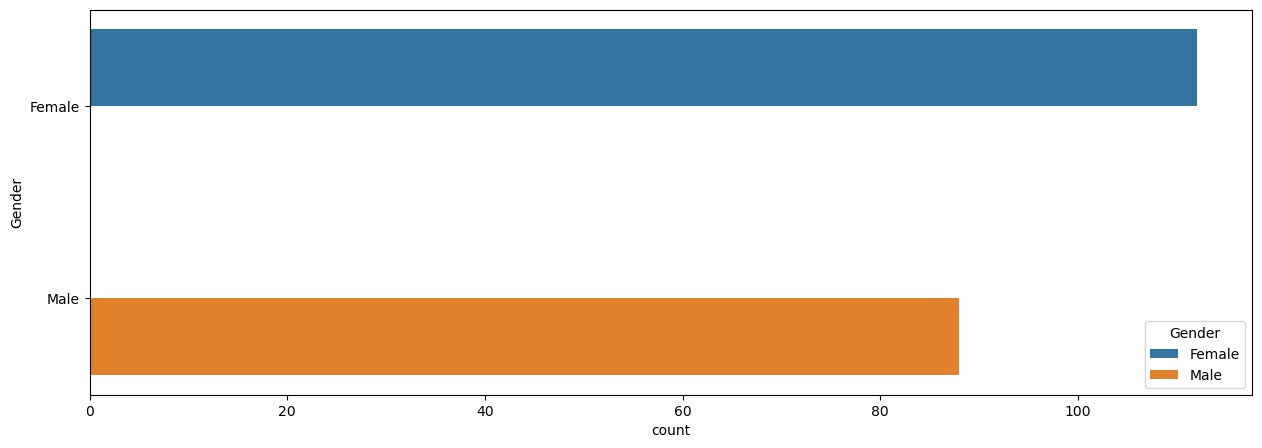

In [22]:
plt.figure(1, figsize = (15, 5))
sns.countplot(y = 'Gender' , hue='Gender',data=data)
plt.show()

# insight1: Count of Male and Female

Here using the countplot we can observe that the visualization allows you to compare the counts of males and females. You can quickly identify the count of female is more in the mall (more than 100) compare to the male.

# scatter plot

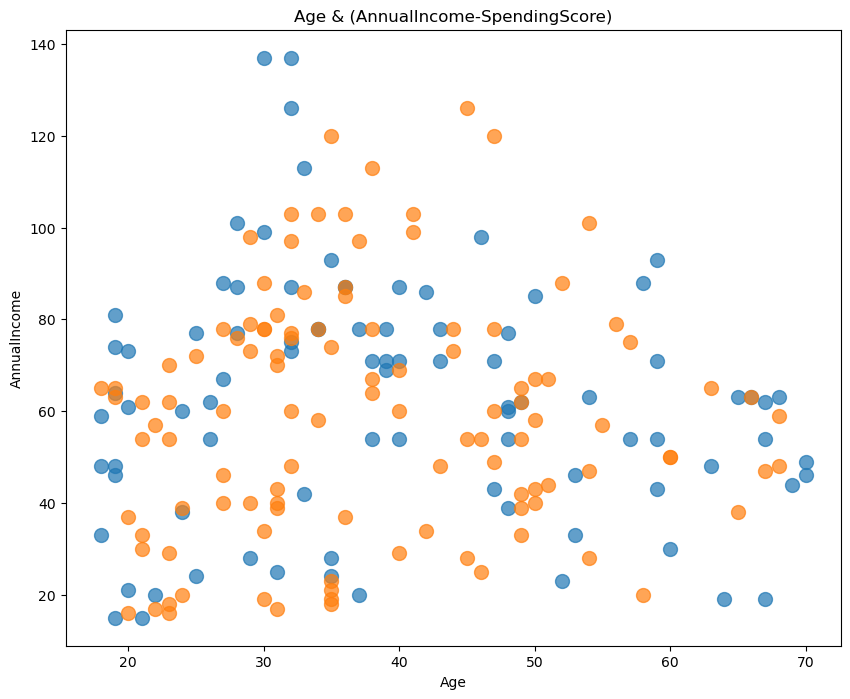

In [23]:

plt.figure(figsize=(10,8))
for gender in data.Gender.unique():
    plt.scatter(x='Age',y='Annual_Income',data=data[data['Gender']==gender],s=100,alpha=.7)
    plt.xlabel('Age')
    plt.ylabel('AnnualIncome')
    plt.title('Age & (AnnualIncome-SpendingScore)')
plt.show()

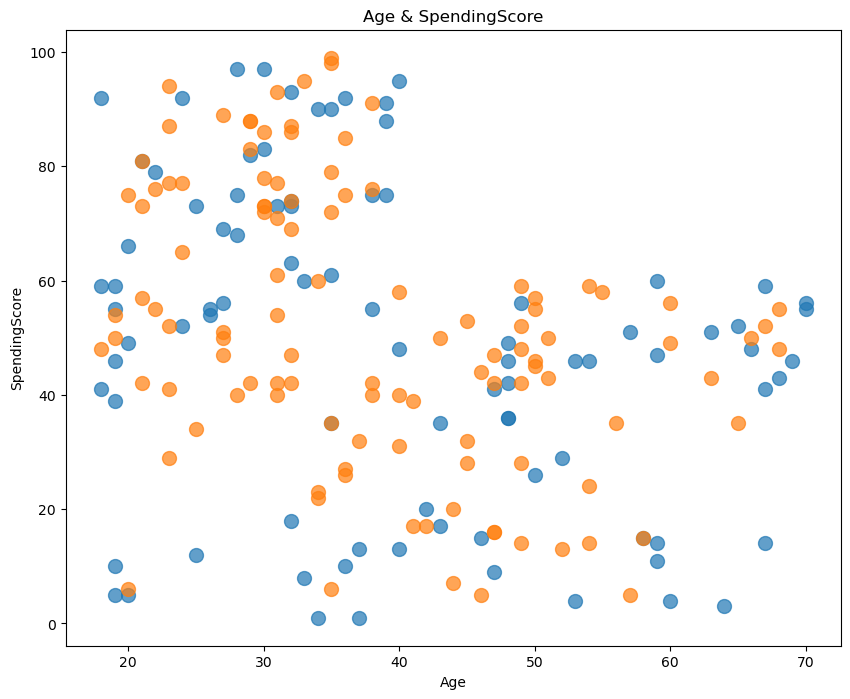

In [24]:
plt.figure(figsize=(10,8))
for gender in data.Gender.unique():
    plt.scatter(x='Age',y='Spending_Score',data=data[data['Gender']==gender],s=100,alpha=.7)
    plt.xlabel('Age')
    plt.ylabel('SpendingScore')
    plt.title('Age & SpendingScore')
plt.show()


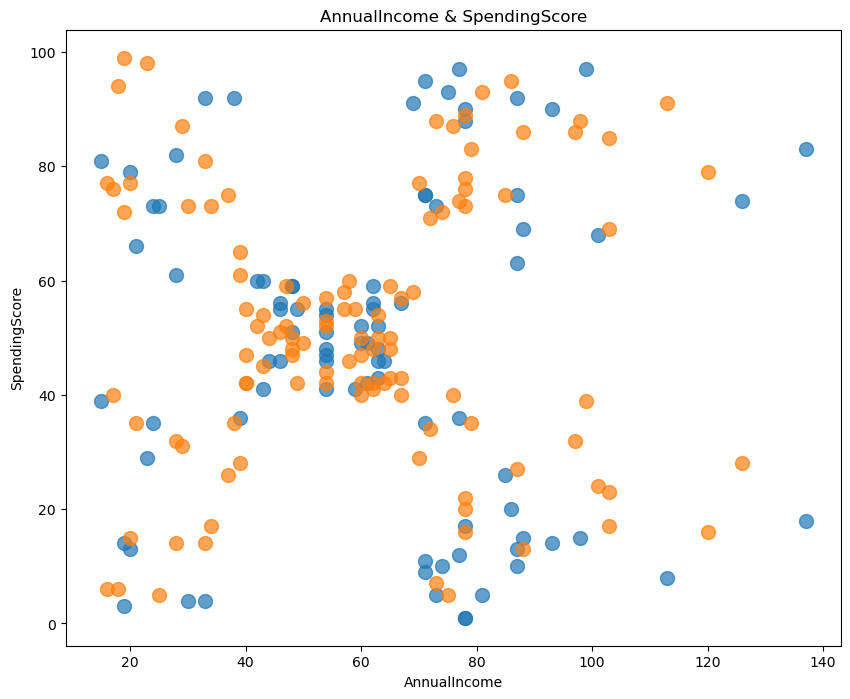

In [25]:
plt.figure(figsize=(10,8))
for gender in data.Gender.unique():
    plt.scatter(x='Annual_Income',y='Spending_Score',data=data[data['Gender']==gender],s=100,alpha=.7)
    plt.xlabel('AnnualIncome')
    plt.ylabel('SpendingScore')
    plt.title('AnnualIncome & SpendingScore')
plt.show()

# Histogram

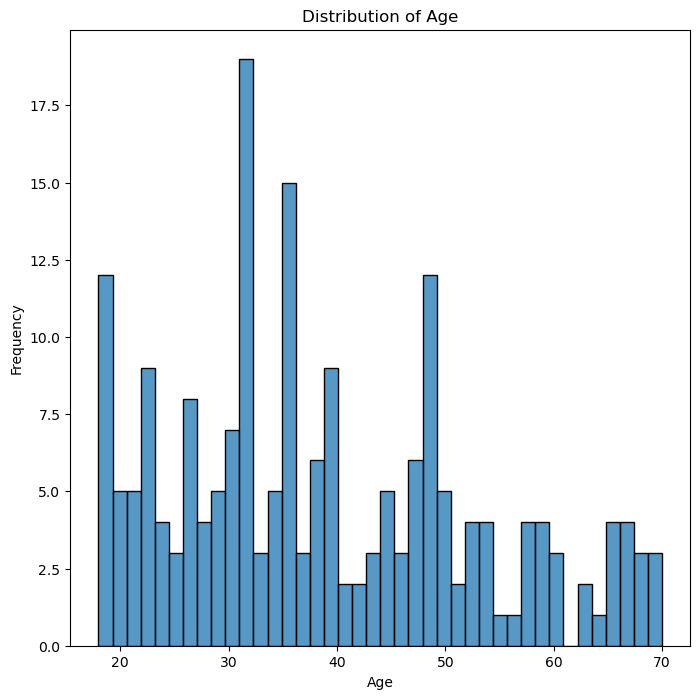

In [26]:

plt.figure(figsize=(8, 8))
sns.histplot(data=data, x='Age', bins=40)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

 # Boxplot

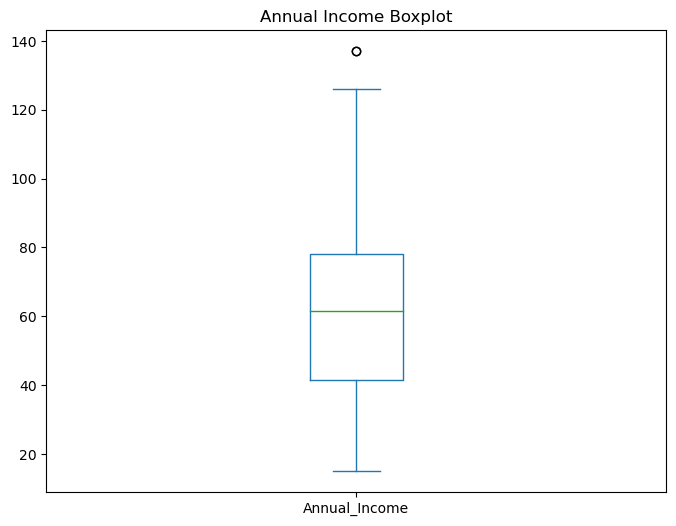

In [27]:
data['Annual_Income'].plot(kind='box', figsize=(8,6), title="Annual Income Boxplot")
plt.show()

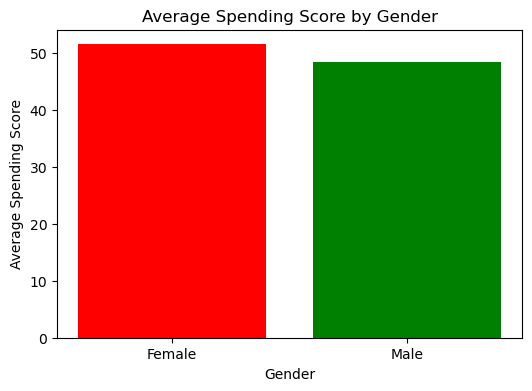

In [28]:

# Calculate the mean spending score for each gender
mean_scores = data.groupby('Gender')['Spending_Score'].mean()

# Create the bar plot
plt.figure(figsize=(6, 4))
plt.bar(mean_scores.index, mean_scores.values,color=['red','green'])
plt.xlabel('Gender')
plt.ylabel('Average Spending Score')
plt.title('Average Spending Score by Gender')
plt.show()

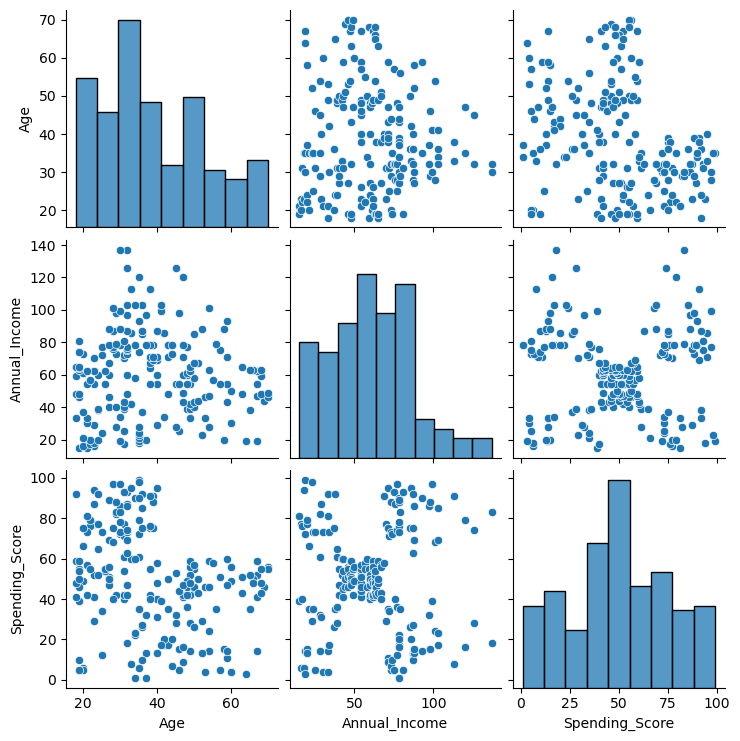

In [29]:
sns.pairplot(data[['Age','Annual_Income','Spending_Score']])
plt.show()